[(0, 4, 2.0866), (0, 8, 2.4648), (0, 12, 2.0555), (0, 16, 2.0729), (0, 20, 2.1128), (0, 24, 1.8337), (0, 28, 1.5362), (0, 32, 2.5124), (0, 36, 1.9393), (0, 40, 2.4197), (0, 44, 1.9359), (0, 48, 2.5516), (0, 52, 1.8818), (0, 56, 2.1767), (0, 60, 1.5371), (0, 64, 2.3212), (0, 68, 1.9714), (0, 72, 2.6059), (0, 76, 2.1833), (0, 80, 1.4283), (0, 84, 2.3721), (0, 88, 1.9396), (0, 92, 2.5992), (0, 96, 2.4483), (0, 100, 1.7554), (0, 104, 2.4511), (0, 108, 2.5559), (0, 112, 2.2727), (0, 116, 2.363), (0, 120, 1.5896), (0, 124, 1.5572), (0, 128, 1.7275), (0, 132, 2.1135), (0, 136, 2.3775), (0, 140, 1.5599), (0, 144, 2.3579), (0, 148, 2.3255), (0, 152, 2.0578), (0, 156, 2.6555), (0, 160, 1.9796), (0, 164, 2.0083), (0, 168, 2.6413), (0, 172, 2.3082), (0, 176, 2.4302), (0, 180, 2.0849), (0, 184, 1.9076), (0, 188, 2.511), (0, 192, 2.3526), (0, 196, 1.5985), (0, 200, 2.0298), (0, 204, 1.9181), (0, 208, 2.1423), (0, 212, 2.1789), (0, 216, 2.6241), (0, 220, 2.2608), (0, 224, 2.3482), (0, 228, 2.1616), (

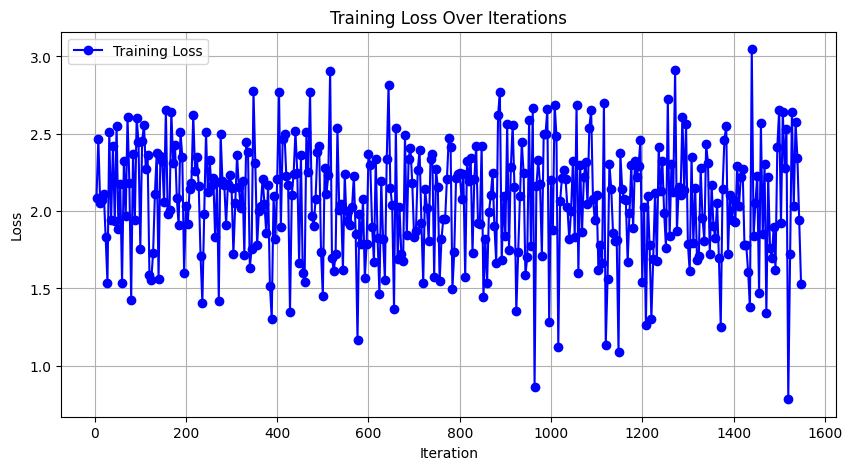

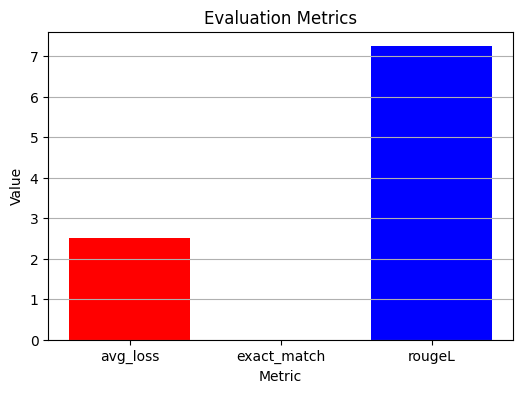

In [3]:
import re
import matplotlib.pyplot as plt

def parse_log_file(file_path):
    train_data = []
    eval_metrics = {}
    
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            #print(line)
            parts = [p.strip() for p in line.split("|")] 
            #print(parts)
            # Extract evaluation metrics
            if parts[0] == "dev":
                # Extract evaluation metrics
                eval_metrics["avg_loss"] = float(parts[1].split(":")[1].strip())
                metrics = eval(parts[2])  # Convert the dictionary string to actual dict
                eval_metrics.update(metrics)

            elif parts[0] == "train":
                # Extract training details
                #print(parts[1], parts[2], parts[5])
                epoch = int(parts[1].split()[1])
                iteration = int(parts[2].split()[1].split("/")[0])
                loss = float(parts[4].split(":")[1].strip())
                train_data.append((epoch, iteration, loss))
            
    
    return train_data, eval_metrics

def plot_training_loss(train_data):
    iterations = [entry[1] for entry in train_data]
    losses = [entry[2] for entry in train_data]
    
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, losses, marker='o', linestyle='-', color='b', label='Training Loss')
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Iterations")
    plt.legend()
    plt.grid()
    plt.show()

def plot_eval_metrics(eval_metrics):
    labels = list(eval_metrics.keys())
    values = list(eval_metrics.values())
    
    plt.figure(figsize=(6, 4))
    plt.bar(labels, values, color=['r', 'g', 'b'])
    plt.xlabel("Metric")
    plt.ylabel("Value")
    plt.title("Evaluation Metrics")
    plt.grid(axis='y')
    plt.show()

# def main():
file_path = "../minillm/results/gpt2/train/sft/e10-bs2-lr1e-05-G1-N1-NN1/log.txt"  # Update with your actual file path
train_data, eval_metrics = parse_log_file(file_path)
print(train_data)
print(eval_metrics)
if train_data:
    plot_training_loss(train_data)

if eval_metrics:
    plot_eval_metrics(eval_metrics)


In [5]:
!pwd

/home/users/ap794/final_project_distillLLM/gemma
